<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/montecarlo_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# https://www.youtube.com/watch?v=ZDq8ZtoWWv8

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

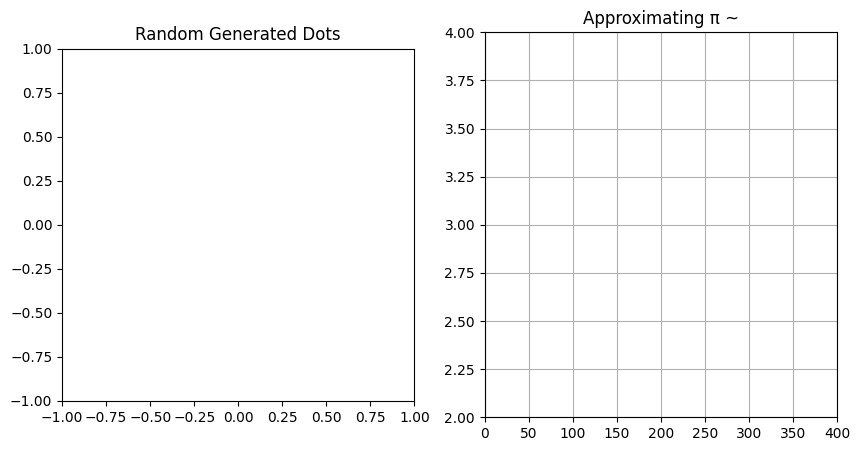

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title('Random Generated Dots')
ax[0].set_aspect('equal')
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-1, 1])

ax[1].set_title('Approximating π ~')
ax[1].set_xlim([0, 400])
ax[1].set_ylim([2, 4])
ax[1].grid()

In [29]:
def aprox_error(measured, accepted):
  return 100 * np.abs(measured - accepted) / accepted

n_samples = np.arange(1, 400)
pi_counter = 0
dots = []
dots_x = []
dots_y = []
dots_color = []
pi_array = []
pi_error = []

scatter = ax[0].scatter(dots_x, dots_y, color=dots_color, marker='o', s=5)
plot, = ax[1].plot([], pi_array, 'black')

for n in n_samples:
  x = np.random.uniform(-1, 1)
  y = np.random.uniform(-1, 1)

  dots_x.append(x)
  dots_y.append(y)

  if np.sqrt(x**2 + y**2) <= 1:
    pi_counter += 1
    color = 'red'
    dots_color.append('red')
  else:
    color = 'blue'
    dots_color.append('blue')

  probability = pi_counter / n
  pi_approx = 4 * probability

  pi_array.append(pi_approx)
  pi_error.append(aprox_error(pi_approx, np.pi))

def animate(i):
  scatter.set_offsets(np.column_stack((dots_x[:i], dots_y[:i])))
  scatter.set_facecolors(dots_color[:i])
  plot.set_data(range(1, i + 1), pi_array[:i])
  plot.set_color('black')
  ax[0].set_title(f'Random Generated Dots ~ % Error ~ {pi_error[i - 1]:.5f}')
  ax[1].set_title(f'Approximating π ~ {pi_array[i - 1]:.5f}')

ani = animation.FuncAnimation(fig, animate, frames=400, interval=50)
ani.save('pi.gif', writer='pillow', fps=20)